In [1]:
#Importing packages and dataset 
#Importing libraries

import pandas as pd                            # data science essentials
import matplotlib.pyplot as plt                # essential graphical output
import seaborn as sns                          # enhanced graphical output
import statsmodels.formula.api as smf          # regression modeling


# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './datasets/Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef = pd.read_excel(io = file)

# Initial Exploration of the Dataset

The first step is to understand the data set. To understand the dataset we first confirm it's size.

In [2]:
#  Understanding the dimensions of the dataset
print(f"""
Size of Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Dataset
------------------------
Observations: 1946
Features:     28



## Size

The dataset has 1946 rows and 28 columns. We will look further into its variables.

In [3]:
#Understading our data
#Checking our variables
chef.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

## Missing Values and data types

After review the data we can say that we have 47 missing values in FAMILY_NAME. Also, we observed 3 float variables,  21 interger variables, and 4 object variables.

Variable Dictionary
-----------------------------------

### CONTINUOUS
----------
 > REVENUE: 
 Total revenue generated from each customer. Note that at times discounts are 
 applied due to special circumstances, but this is extremely rare and not 
 recorded in a separate column.
 
 > AVG_TIME_PER_SITE_VISIT: 
 Average time each customer spent per website or mobile app visit
 
 > AVG_PREP_VID_TIME: 
 Average time in seconds meal prep instruction video was was playing
 
  > AVG_CLICKS_PER_VISIT: 
 Average number of clicks per site or mobile app visit


### INTERVAL/COUNT
--------------
 > CROSS_SELL_SUCCESS: 
 Success of the cross-sell promotion (1 = yes, 0 = no)
 
 > TOTAL_MEALS_ORDERED: 
 Total number of meals ordered by each customer. Customers can order several
 meals at one time.
 
 > UNIQUE_MEALS_PURCH: 
 Number of unique meal sets ordered by each customer
 
 > CONTACTS_W_CUSTOMER_SERVICE: 
 Number of times each customer made contact with customer service. This number
 does not include rating meal sets or completing satisfaction surveys.
 
 > PRODUCT_CATEGORIES_VIEWED: 
 Total number of meal categories viewed (vegan, etc.)
 
 > MOBILE_NUMBER: 
Indicates whether the registered phone number of a custmer is mobile or 
landline (1 = mobile, 0 = landline)
 
 > CANCELLATIONS_BEFORE_NOON: 
 Number of meals canceled BEFORE 12:00 PM (noon) as per cancelation policy)
 
 > CANCELLATIONS_AFTER_NOON: 
  Number of meals canceled AFT
  ER 12:00 PM (noon) as per cancelation policy
 
 > TASTES_AND_PREFERENCES: 
 Customer specified their tastes and preferences in their profile (optional)
 
 > PC_LOGINS: 
Total number of logins to the website
 
 > MOBILE_LOGINS: 
 Total number of logins to the mobile platform
 
 > WEEKLY_PLAN: 
 Number of weeks customer subscribed to the weekly plan discount promotion
 
 > EARLY_DELIVERIES: 
 Total meal deliveries that arrived early
 
 > LATE_DELIVERIES: 
 Total meal deliveries that arrived late
 
 > PACKAGE_LOCKER: 
 Customer's residence/building has a package locker service or package room
 
 > REFRIGERATED_LOCKER: 
 Package locker has refrigerated compartments
 
 > LARGEST_ORDER_SIZE: 
 MISLABELED: Despite the fact that this feature is labeled LARGEST_ORDER_SIZE,
 it actually represents the AVERAGE number of meals ordered per customer.
 
 > MASTER_CLASSES_ATTENDED: 
 Number of times each customer attended a master cooking class
 
 > MEDIAN_MEAL_RATING: 
 Median rating of meal sets by each customer
 
 > TOTAL_PHOTOS_VIEWED: 
 Total number of clicks on photos across all website or mobile app visits


### CATEGORICAL
-----------
 > NAME: 
 Full name of customer
 
 > EMAIL 
 Email of customer
 
 > FIRST_NAME
 First name of customer
 
 > FAMILY_NAME
 Last name of customer

----------------------
 


### Data type discrepancy

While reviewing the data dictionary and the data types of the variables we found that AVG_PREP_VID_TIME is supposed to be float instead of interger, therefore we change the column data type.

In [4]:
#Changing int to float
chef['AVG_PREP_VID_TIME'] = chef['AVG_PREP_VID_TIME'].astype(float) 

# Dummy Variables for Categorical Data
## Email Domains

While analyzing the categorical variables and the material available we discovered that we could create dummy variables to check the correlation in the email domain group (professional, personal or junk) with the revenue per customer. We created this dummy variables by splitting the email domain and by using the domain information in the preview material. 

In [5]:
# Feature Enginneering - Dummie variables over email domains
# Splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# safety measure in case of multiple concatenations - SAVE
chef = pd.read_excel(file)

# renaming column to concatenate
email_df.columns = ['trash' , 'email_domain'] #renaming columns


# concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, email_df['email_domain']],
                   axis = 1) #1 to Columns, 0 to rows

#Creating the categories 
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com',
                              '@caterpillar.com', '@chevron.com', '@cocacola.com',
                              '@disney.com', '@dupont.com', '@exxon.com', '@ge.org',
                              '@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com',
                              '@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com',
                              '@microsoft.com','@nike.com','@pfizer.com','@pg.com',
                              '@travelers.com','@unitedtech.com','@unitedhealth.com',
                              '@verizon.com','@visa.com','@walmart.com']

personal_email_domains  = ['@gmail.com','@yahoo.com','@protonmail.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domain']:
        if '@'+domain in personal_email_domains :
            placeholder_lst.append('personal')
            
        elif '@'+domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        else:
            placeholder_lst.append('junk')


# concatenating with original DataFrame
chef['email_domain_group'] = pd.Series(data=placeholder_lst, dtype=str)


# checking results
chef['email_domain_group'].value_counts()


personal        861
professional    678
junk            407
Name: email_domain_group, dtype: int64

In [6]:
# placeholder list
placeholder_lst = []

#new dummie category personal email
d1 = ['personal']
v1 = 1
v2 = 0

# creating dummie variables 1 personal email
for domain in chef['email_domain_group']:
        if domain in d1:
            placeholder_lst.append(v1)
            
        else:
            placeholder_lst.append(v2)

# concatenating with original DataFrame
chef['D1_personal_email'] = pd.Series(data=placeholder_lst, dtype=int)


# checking results
chef['D1_personal_email'].value_counts()


0    1085
1     861
Name: D1_personal_email, dtype: int64

In [7]:
# placeholder list
placeholder_lst = []

#new dummie category 2 professional
d2 = ['professional']
v1 = 1
v2 = 0

# creating dummie variables 2 professional email
for domain in chef['email_domain_group']:
        if domain in d2:
            placeholder_lst.append(v1)
            
        else:
            placeholder_lst.append(v2)

# concatenating with original DataFrame
chef['D2_professional_email'] = pd.Series(data=placeholder_lst, dtype=int)


# checking results
chef['D2_professional_email'].value_counts()

0    1268
1     678
Name: D2_professional_email, dtype: int64

In [8]:
# placeholder list
placeholder_lst = []

#new dummie category 3 junk
d3 = ['junk']
v1 = 1
v2 = 0

# creating dummie variables 3 junk email
for domain in chef['email_domain_group']:
        if domain in d3:
            placeholder_lst.append(v1)
            
        else:
            placeholder_lst.append(v2)

# concatenating with original DataFrame
chef['D3_junk_email'] = pd.Series(data=placeholder_lst, dtype=int)


# checking results
chef['D3_junk_email'].value_counts()

0    1539
1     407
Name: D3_junk_email, dtype: int64

In [9]:
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    word_len = len(chef.loc[index, 'NAME'])
    
    # appending placeholder_lst with the results
    placeholder_lst.append(word_len)
    

# converting placeholder_lst into a DataFrame 
word_len_df = pd.DataFrame(placeholder_lst)

# renaming column to concatenate
word_len_df.columns = ['Name_Len'] #renaming columns


# concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, word_len_df['Name_Len']],
                   axis = 1) 

# Correlation of Response Variables against the Independent Variable

The next step was to understand the variables and its correlation against the variable Revenue.

In [10]:
# creating a list of features
x_var= ['REVENUE', 'CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
       'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'D1_personal_email',
        'D2_professional_email','D3_junk_email', 'Name_Len']

# Developing a correlation matrix based on features
chef_corr = chef[x_var].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
chef_corr.loc[ : , 'REVENUE'].round(decimals = 4).sort_values(ascending = False)



REVENUE                        1.0000
AVG_PREP_VID_TIME              0.6436
MEDIAN_MEAL_RATING             0.6079
TOTAL_MEALS_ORDERED            0.6005
TOTAL_PHOTOS_VIEWED            0.4660
MASTER_CLASSES_ATTENDED        0.4490
LARGEST_ORDER_SIZE             0.4351
AVG_TIME_PER_SITE_VISIT        0.1446
CONTACTS_W_CUSTOMER_SERVICE    0.1017
PRODUCT_CATEGORIES_VIEWED      0.0345
MOBILE_NUMBER                  0.0312
PC_LOGINS                      0.0161
D2_professional_email          0.0152
Name_Len                       0.0137
CANCELLATIONS_BEFORE_NOON      0.0136
WEEKLY_PLAN                    0.0098
D1_personal_email              0.0080
TASTES_AND_PREFERENCES         0.0078
CROSS_SELL_SUCCESS             0.0045
REFRIGERATED_LOCKER           -0.0003
EARLY_DELIVERIES              -0.0009
LATE_DELIVERIES               -0.0086
PACKAGE_LOCKER                -0.0106
MOBILE_LOGINS                 -0.0192
D3_junk_email                 -0.0276
CANCELLATIONS_AFTER_NOON      -0.0361
UNIQUE_MEALS

## Chosen Variables for Model Development

According to the correlation results we will only consider highly correlated variables.

Therefore we will consider only the next variables:

> AVG_PREP_VID_TIME              0.6436

> MEDIAN_MEAL_RATING             0.6079

> TOTAL_MEALS_ORDERED            0.6005

> TOTAL_PHOTOS_VIEWED            0.4660

> MASTER_CLASSES_ATTENDED        0.4490

> LARGEST_ORDER_SIZE             0.4351

> AVG_TIME_PER_SITE_VISIT        0.1446

> CONTACTS_W_CUSTOMER_SERVICE    0.1017

> UNIQUE_MEALS_PURCH            -0.0628

> AVG_CLICKS_PER_VISIT          -0.5538


# Response Variables Analysis

The next step is to graph every histogram, boxplots and scatterplots.

## Histograms

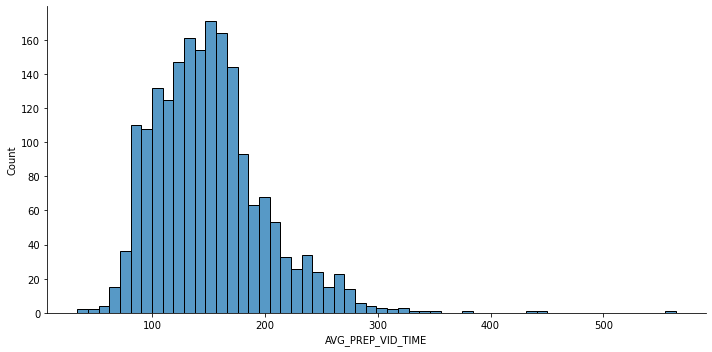

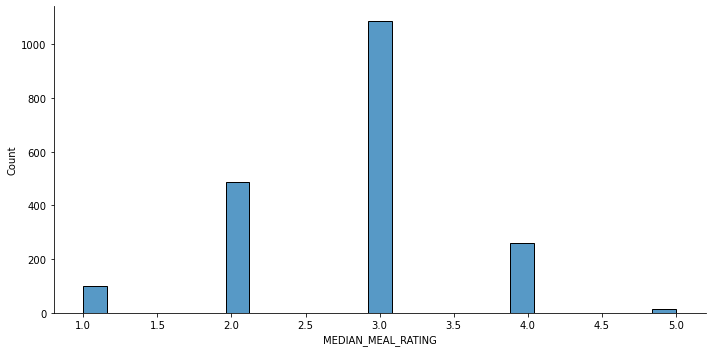

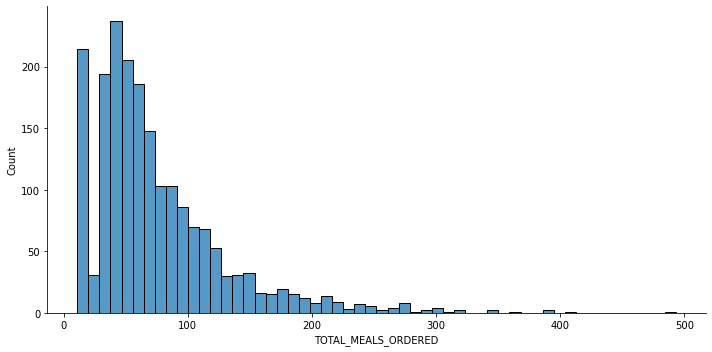

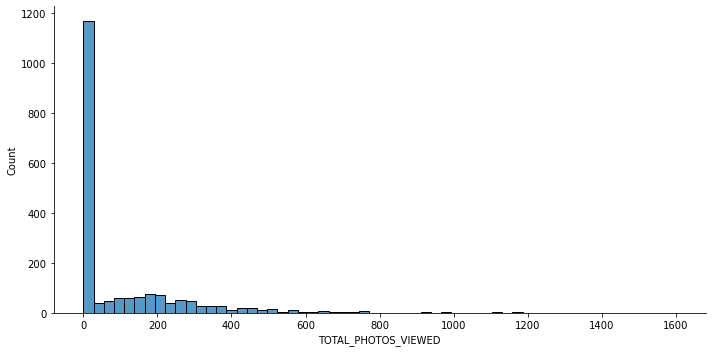

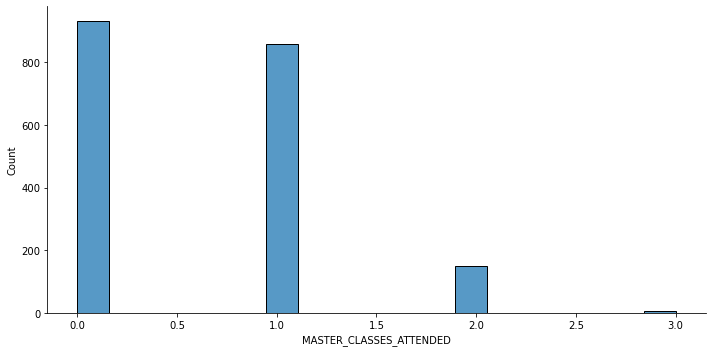

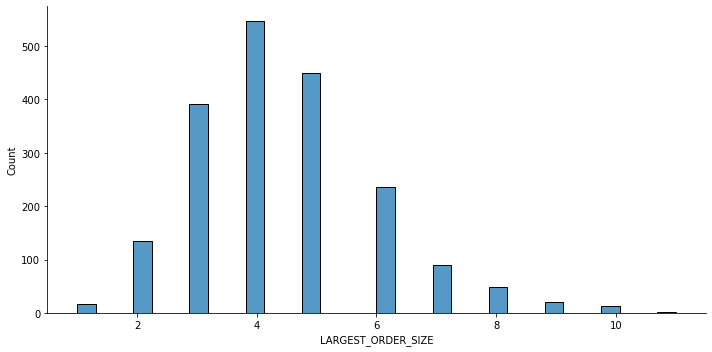

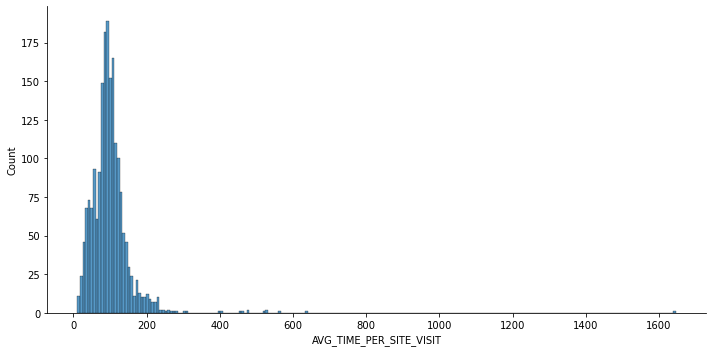

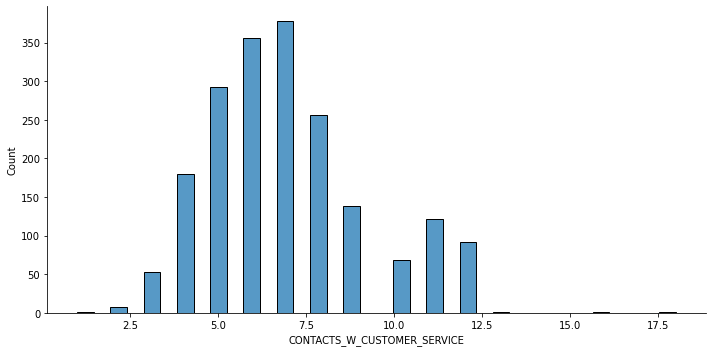

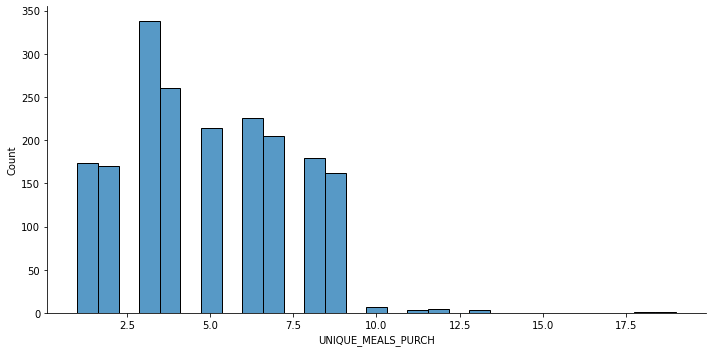

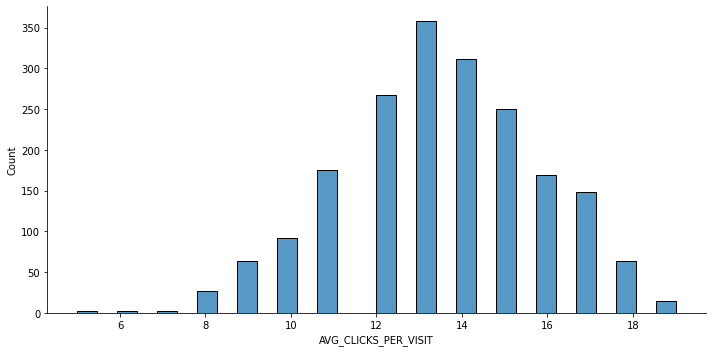

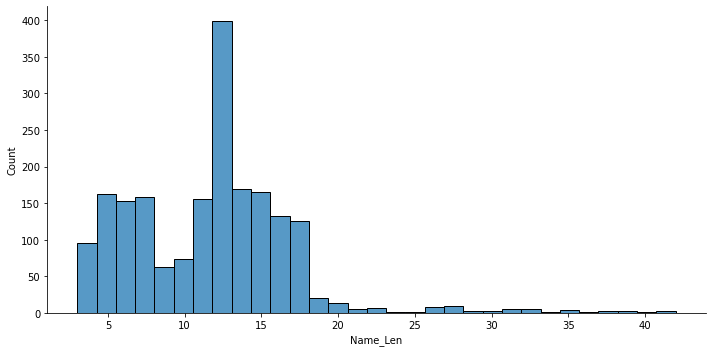

In [11]:
#### #Understanding the variables
# Creating histograms & bloxplots
x_var = [
    'AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING', 'TOTAL_MEALS_ORDERED',
    'TOTAL_PHOTOS_VIEWED', 'MASTER_CLASSES_ATTENDED', 'LARGEST_ORDER_SIZE',
    'AVG_TIME_PER_SITE_VISIT', 'CONTACTS_W_CUSTOMER_SERVICE',
    'UNIQUE_MEALS_PURCH', 'AVG_CLICKS_PER_VISIT','Name_Len'
]

# Creating histograms
for i in x_var:

    sns.displot(data=chef, x=i, height=5, aspect=2)
    plt.show()

## Bloxplots

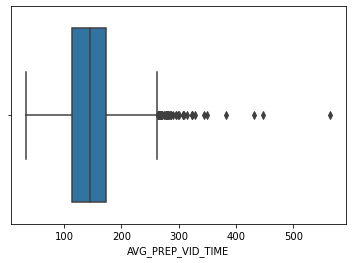

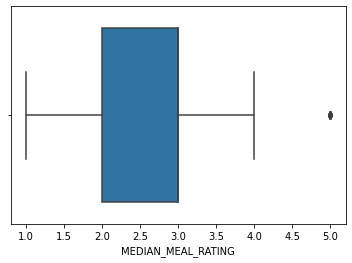

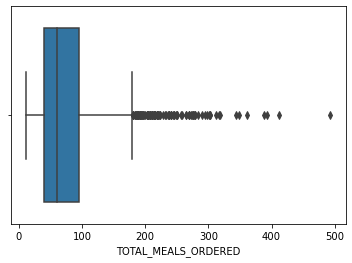

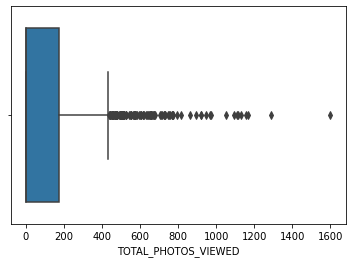

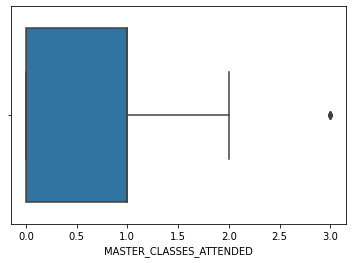

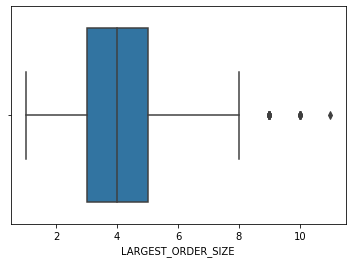

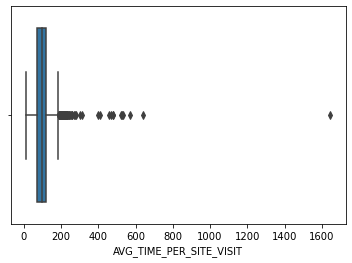

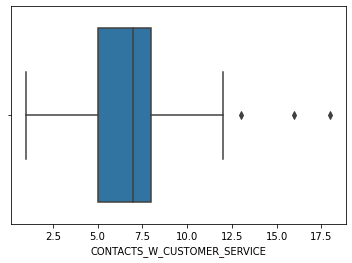

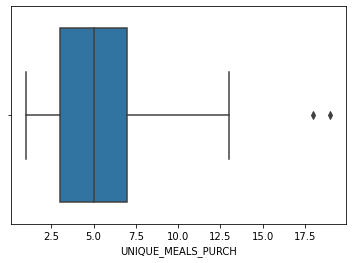

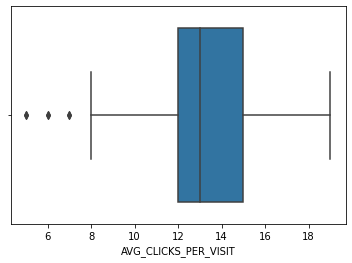

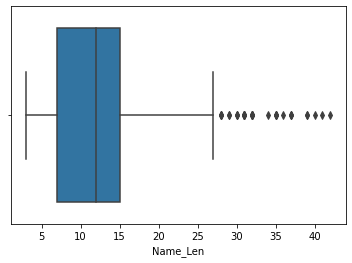

In [12]:
# Creating histograms
for i in x_var:  
    
    sns.boxplot(data   = chef,
                x      = i)
    plt.show()


## Scatterplots and Boxplot for Interval Variables

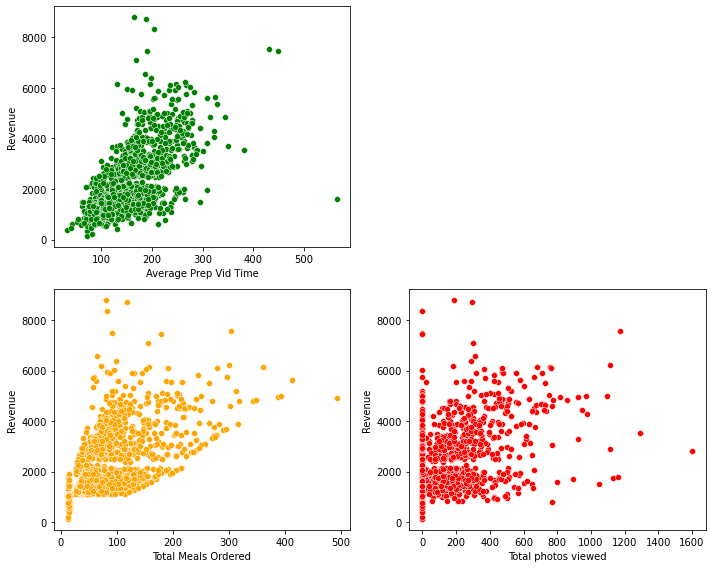

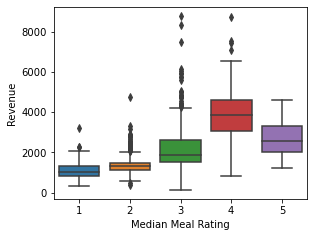

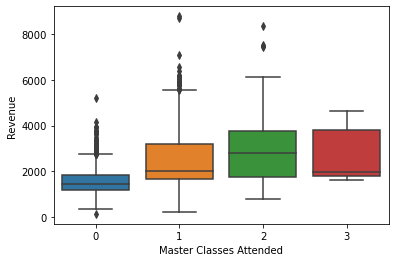

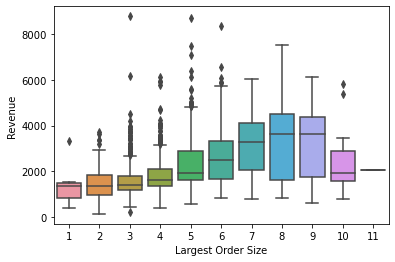

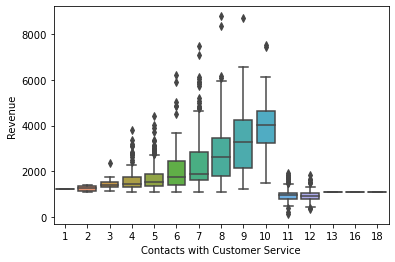

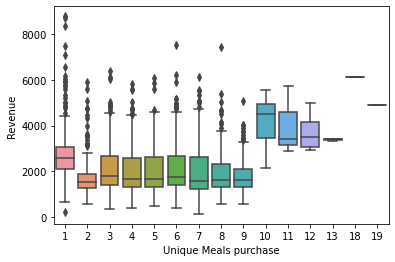

In [13]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Average Prep Vid Time')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Meals Ordered')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total photos viewed')
plt.ylabel(ylabel = 'Revenue')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Housing Scatterplots 1 of 2.png')
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Average Time per site visit')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
            y    = 'REVENUE',
            data = chef)

# titles and axis labels

plt.xlabel(xlabel = 'Median Meal Rating')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

########################
# developing a boxplot
sns.boxplot(x    = 'MASTER_CLASSES_ATTENDED',
            y    = 'REVENUE',
            data = chef)

# titles and axis labels
plt.xlabel(xlabel = 'Master Classes Attended')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

########################

# developing a boxplot
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
            y    = 'REVENUE',
            data = chef)

# titles and axis labels
plt.xlabel(xlabel = 'Largest Order Size')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

'CONTACTS_W_CUSTOMER_SERVICE', 'UNIQUE_MEALS_PURCH'

########################

# developing a boxplot
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = chef)

# titles and axis labels
plt.xlabel(xlabel = 'Contacts with Customer Service')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

'', ''

########################
# developing a boxplot
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
            y    = 'REVENUE',
            data = chef)

# titles and axis labels
plt.xlabel(xlabel = 'Unique Meals purchase')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()


########################

# Feature Engineering

## Zeros in Continue Variables
From the analysis above, it is evident that continuous variable Total Photos Viewed have a high amount of zero values,  let's explore further by analyzing how many observations are affected.

In [14]:
#Continuous Variable Analysis
# counting the number of zeroes
tphotosview_zeroes     = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == 0])


## the table below has been coded for you ##

# printing a table of the results
print(f"""
                              No\t\tYes
------------------------------------------------------------------
Total Photos View           | {tphotosview_zeroes}   \t\t{len(chef) - tphotosview_zeroes}
""")



                              No		Yes
------------------------------------------------------------------
Total Photos View           | 1140   		806



Based on the table above, it has at least 100 observations in both the 'yes' and 'no' columns. Therefore we will create a flag-based feature and review its correlation.

In [15]:
# dummy variable for having a basement.
chef['Viewed_Photos']   = 0

for index, value in chef.iterrows():
    
    # Total_Bsmt_SF
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'Viewed_Photos'] = 1



## Log Transformation for Interval Variables

Also, we won't explore if we can achieve a linear regression on the interval data by log transforming the data because the variables do not comply with at least 100 observartion on each part of the feature as the basic rule for Flag-Based Feature Engineering says.


In [16]:
#Understading our data
#Checking our variables values
chef.describe().round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,D1_personal_email,D2_professional_email,D3_junk_email,Name_Len,Viewed_Photos
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43,0.44,0.35,0.21,11.74,0.41
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01,0.50,0.48,0.41,5.29,0.49
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00,0.00,0.00,0.00,3.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00,0.00,0.00,0.00,7.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00,0.00,0.00,0.00,12.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00,1.00,1.00,0.00,15.00,1.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00,1.00,1.00,1.00,42.00,1.00


In [17]:
# creating a list of features
x_var= ['REVENUE', 'Viewed_Photos']

# Developing a correlation matrix based on features
chef_corr = chef[x_var].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
chef_corr.loc[ : , 'REVENUE'].round(decimals = 4).sort_values(ascending = False)



REVENUE          1.0000
Viewed_Photos    0.3721
Name: REVENUE, dtype: float64

##  Collinearity Analysis

### Heatmap

We will create a Heatmap to review our final features correlation and discard any collinearity. 

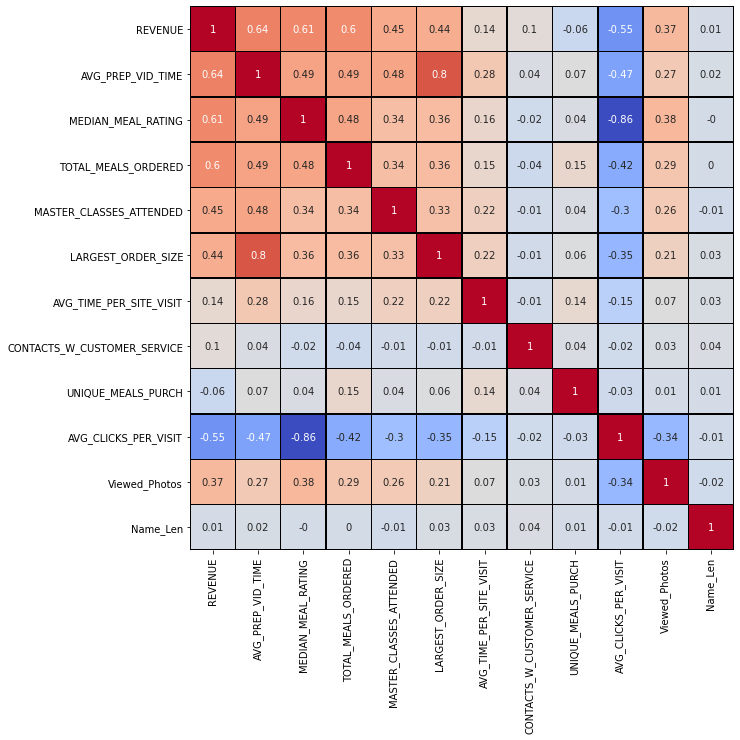

In [18]:
# correlation heatmap
# instantiating a correlation matrix
df_corr = chef.corr().round(2)

# setting figure size
fig, ax = plt.subplots(figsize=(10,10))


# limiting the size of the correlation matrix
df_corr2 = df_corr.loc[ ['REVENUE','AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING', 
                     'TOTAL_MEALS_ORDERED','MASTER_CLASSES_ATTENDED','LARGEST_ORDER_SIZE', 
                     'AVG_TIME_PER_SITE_VISIT',  'CONTACTS_W_CUSTOMER_SERVICE',
                     'UNIQUE_MEALS_PURCH', 'AVG_CLICKS_PER_VISIT', 'Viewed_Photos', 'Name_Len' ],
                        ['REVENUE','AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING', 
                     'TOTAL_MEALS_ORDERED','MASTER_CLASSES_ATTENDED','LARGEST_ORDER_SIZE', 
                     'AVG_TIME_PER_SITE_VISIT',  'CONTACTS_W_CUSTOMER_SERVICE',
                     'UNIQUE_MEALS_PURCH', 'AVG_CLICKS_PER_VISIT', 'Viewed_Photos','Name_Len' ]]




# visualizing the correlation matrix
sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)


# saving and displaying the correlation matrix
plt.savefig('Chef Apprendi Correlation Heatmap.png')
plt.show()

After review the Heatmap, we can spot collinearity between Largest Order Size and AVG_PREP_VID_TIME. Also, we can observed that Median Meal Rating and AVG Clicks per visit are highly negative correlated. Therefore we should take out the variables that are less correlated (positive or negative) to REVENUE variable.

# Creating the model

## Creating a independent file

It is a good practice to create an independent file so we can test the regression over it.

In [19]:
# making a copy 
chef_model = chef.copy()


# dropping unused variables
chef_model = chef.drop([ 'CROSS_SELL_SUCCESS','NAME', 'EMAIL', 'FIRST_NAME', 
                                    'FAMILY_NAME','PRODUCT_CATEGORIES_VIEWED','MOBILE_NUMBER',
                                    'CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON',
                                    'TASTES_AND_PREFERENCES','PC_LOGINS','MOBILE_LOGINS', 
                                    'WEEKLY_PLAN','EARLY_DELIVERIES', 'LATE_DELIVERIES',
                                    'PACKAGE_LOCKER','REFRIGERATED_LOCKER','LARGEST_ORDER_SIZE'  , 
                                    'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'email_domain',
                                    'email_domain_group', 'D1_personal_email', 'D2_professional_email',
                                    'D3_junk_email'], axis = 1)


# saving feature-rich dataset in Excel
chef_model.to_excel('./datasets/chef_feature_rich.xlsx',
                 index = False)

## Preparing training and testing sets for model development.

In this module of coding we are preparing the explanatory variable data by dropping Revenue from the dataset, and also preparing the response variable by subsetting Revenue.


In [20]:
# call the file
file = './datasets/chef_feature_rich.xlsx'

# reading the file into Python
chef_feature = pd.read_excel(io = file)


df_data=chef_feature.drop(['REVENUE'],axis=1)
df_target= chef_feature.loc[:,'REVENUE']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 9)
y-side: (1459,)


Testing Data
------------
X-side: (487, 9)
y-side: (487,)



## Simple Regression  (OLS)

In [27]:
# merging X_train and y_train so that they can be used in statsmodels
chef_f_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~  + AVG_PREP_VID_TIME + MEDIAN_MEAL_RATING +
TOTAL_MEALS_ORDERED + MASTER_CLASSES_ATTENDED + AVG_TIME_PER_SITE_VISIT + 
CONTACTS_W_CUSTOMER_SERVICE + UNIQUE_MEALS_PURCH + Viewed_Photos  """,
                                data = chef_f_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     293.0
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          2.09e-296
Time:                        15:26:06   Log-Likelihood:                -11615.
No. Observations:                1459   AIC:                         2.325e+04
Df Residuals:                    1450   BIC:                         2.330e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

The adjusted R squared is of 61.8% and the variables we included p values under 0.05, which is good.

## Applying Scikit-learn 

In [28]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = chef_feature[['AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING','TOTAL_MEALS_ORDERED',
                'MASTER_CLASSES_ATTENDED','AVG_TIME_PER_SITE_VISIT',
                'CONTACTS_W_CUSTOMER_SERVICE','UNIQUE_MEALS_PURCH', 'Viewed_Photos','Name_Len' ]]


# preparing response variable
chef_target = chef_feature['REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            df_data,     # x-variables
            df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [29]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test)


# SCORING the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test, y_test).round(4)) # using R-square

# saving scoring results
lr_train_score = lr.score(x_train, y_train).round(4)
lr_test_score  = lr.score(x_test, y_test).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)


OLS Training Score : 0.6181
OLS Testing Score  : 0.6463
OLS Train-Test Gap : 0.0282


In [30]:
import sklearn.linear_model # linear models

# INSTANTIATING a model object
lasso = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lr_fit = lasso.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lasso.predict(x_test)


# SCORING the results
print('lasso Training Score :', lasso.score(x_train, y_train).round(4))  # using R-square
print('lasso Testing Score  :',  lasso.score(x_test, y_test).round(4)) # using R-square

# saving scoring results
lasso_train_score = lasso.score(x_train, y_train).round(4)
lasso_test_score  = lasso.score(x_test, y_test).round(4)

# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

lasso Training Score : 0.6113
lasso Testing Score  : 0.6357
Lasso Train-Test Gap : 0.0244


In [31]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)


Training Score: 0.6178
Testing Score : 0.6465
ARD Train-Test Gap : 0.0287


In [32]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
}


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6181            0.6463
Lasso      0.6113           0.6357
ARD        0.6178           0.6465

